# JanataHack: Machine Learning for Banking
Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, know
ing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.



In [1]:
from IPython.display import Image

DATA DICTIONARY


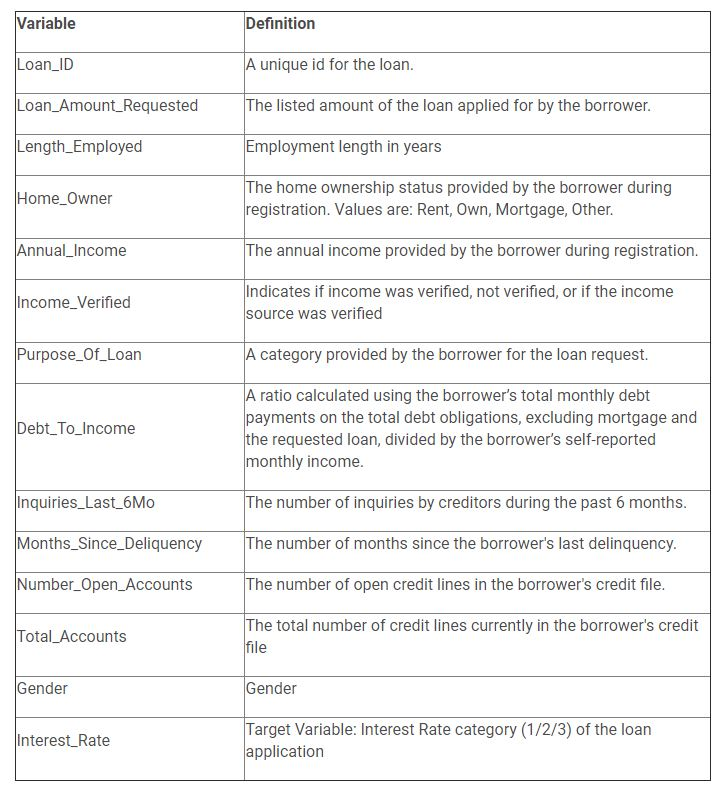

In [2]:
print('DATA DICTIONARY')
Image('D:\DS\Janata Hack_AnalyticsVidhya\Machine Learning for Banking_30thMay2020\DataDictionary.JPG')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
#Importing training data provided
Train_dt_full=pd.read_csv('D:\\DS\\Janata Hack_AnalyticsVidhya\\Machine Learning for Banking_30thMay2020\\train_fNxu4vz.csv')

In [5]:
Train_dt_full.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [6]:
Train_dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null object
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 17.6+ MB


In [7]:
#LoanID column gives no predictive value as a feature, so we will drop it
Train_dt_full.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
Train_dt_full.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [9]:
Train_dt_full['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

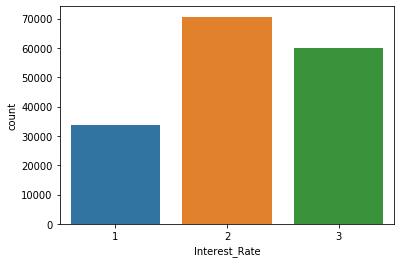

In [10]:
sn.countplot(x=Train_dt_full['Interest_Rate'])

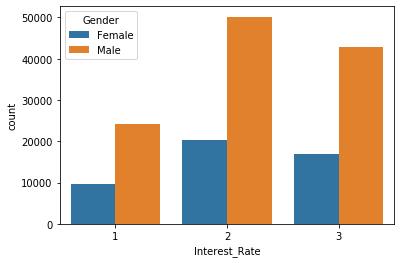

In [11]:
#int rate wrt gender
sn.countplot(x=Train_dt_full['Interest_Rate'],hue=Train_dt_full['Gender'])

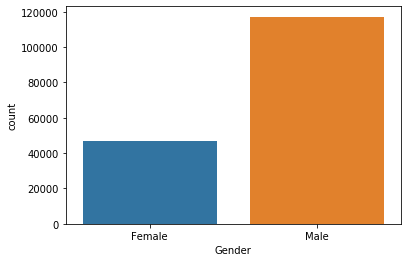

In [12]:
sn.countplot(x=Train_dt_full['Gender'])

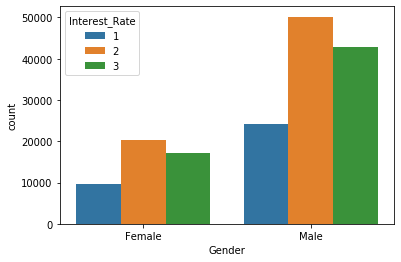

In [13]:
#  gender wrt int rate
sn.countplot(x=Train_dt_full['Gender'],hue=Train_dt_full['Interest_Rate'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

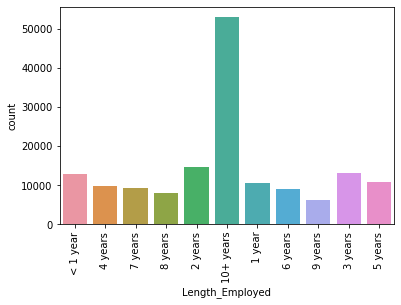

In [14]:
#Length_Employed data check view
sn.countplot(x=Train_dt_full['Length_Employed'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

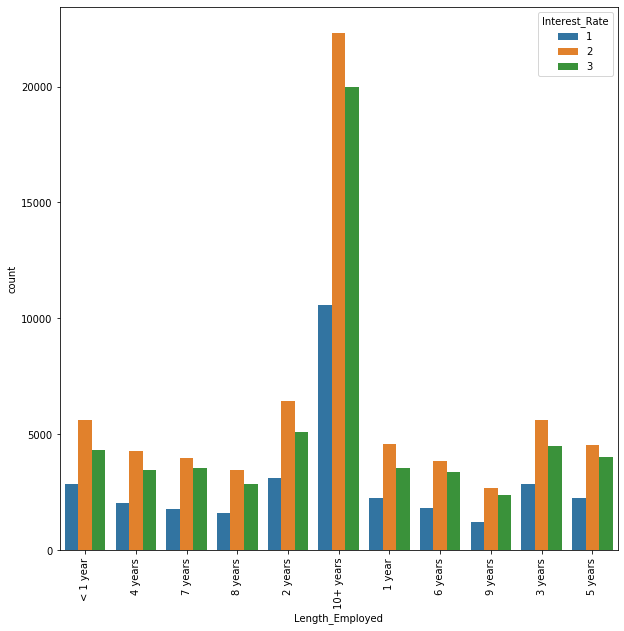

In [15]:
#Interest rate wrt Length_Employed data check view
plt.figure(figsize=(10,10))
sn.countplot(x=Train_dt_full['Length_Employed'],hue=Train_dt_full['Interest_Rate'])
plt.xticks(rotation=90)

Looks like data type is not numeric 


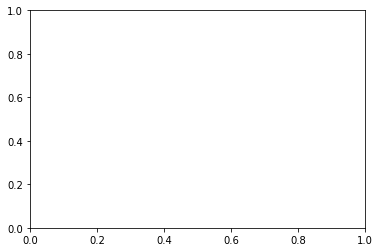

In [16]:
#Loan_Amount_Requested
try:
    
    sn.boxplot(Train_dt_full['Loan_Amount_Requested'])
except TypeError:
    print("Looks like data type is not numeric ")


In [17]:
#Changing datatype:
Train_dt_full["Loan_Amount_Requested"] = Train_dt_full["Loan_Amount_Requested"].str.replace(",","").astype(float)

In [18]:
#Changing datatype:
#Train_dt_full['Loan_Amount_Requested']=pd.to_numeric(Train_dt_full['Loan_Amount_Requested'],errors='coerce')

In [19]:
Train_dt_full['Loan_Amount_Requested'].dtype

dtype('float64')

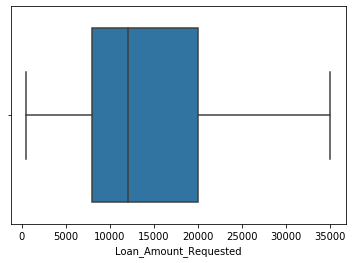

In [20]:
try:
    
    sn.boxplot(Train_dt_full['Loan_Amount_Requested'])
except TypeError:
    print("Looks like data type is not numeric ")

In [21]:
Train_dt_full['Loan_Amount_Requested'].describe()

count    164309.00000
mean      14349.33692
std        8281.86870
min         500.00000
25%        8000.00000
50%       12075.00000
75%       20000.00000
max       35000.00000
Name: Loan_Amount_Requested, dtype: float64

In [22]:
Train_dt_full.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


C:\Users\subra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


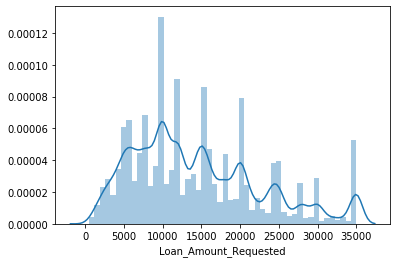

In [23]:
sn.distplot(Train_dt_full['Loan_Amount_Requested'])

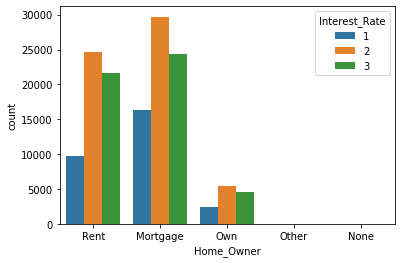

In [24]:
#Length_Employed
sn.countplot(Train_dt_full['Home_Owner'],hue=Train_dt_full['Interest_Rate'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

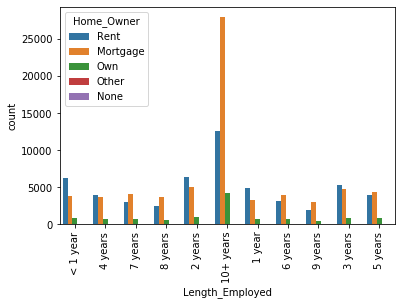

In [25]:
sn.countplot(x=Train_dt_full['Length_Employed'],hue=Train_dt_full['Home_Owner'])
plt.xticks(rotation=90)

*Till now it is clear that mostly the people who have mortgage or rent has more loan needs \n
*Mostly Male Customers 
*Mostly 10+ Years work experience applied for loans
*As years of experience increases we can observe in rise of mortgages


In [26]:
Train_dt_full.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [27]:
#Checking the wierd values of loan amount=500,definelty outlier(mostly incorrectly added)
Train_dt_full[Train_dt_full['Loan_Amount_Requested']==500]

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
40073,500.0,< 1 year,Rent,18000.00,not verified,other,4.27,0,0.0,4,4,Male,1
67071,500.0,< 1 year,Mortgage,7904.04,not verified,vacation,3.04,2,8.0,3,6,Female,2
94119,500.0,3 years,Mortgage,26000.00,not verified,small_business,14.17,0,38.0,8,28,Male,2


Next Items
Data Cleaning (NULL handling)
Conversion of data types
Outlier detection 
categorical values handling


#Next will focus on Loan_Amount_Requested , experience looks corelated with loan category 


# Feature Enginnering :


# Length_Employed
We wil convert the loan into numbers with below assumtions

> less than 1 year =0.8 year assuming very rarely freshers applies for loan within 6 months after joining
> 10 or 10+ as 10 years 
> So we will have in numbers 0.8 ,1,2,3,4,5,6,7,8,9,10

In [28]:
Train_dt_full['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

#checking central tendency value to replace numeric missing values
#Will Try mean median 

In [29]:
#Median
Train_dt_full[Train_dt_full['Length_Employed'].isnull()].median(axis=0,skipna=True)

C:\Users\subra\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Loan_Amount_Requested      10000.00
Length_Employed                 NaN
Annual_Income              44200.00
Debt_To_Income                18.14
Inquiries_Last_6Mo             0.00
Months_Since_Deliquency       34.00
Number_Open_Accounts           9.00
Total_Accounts                22.00
Interest_Rate                  2.00
dtype: float64

In [30]:
#Mean
Train_dt_full[Train_dt_full['Length_Employed'].isnull()].mean(axis=0,skipna=True)

Loan_Amount_Requested      11493.108126
Length_Employed                     NaN
Annual_Income              49508.856911
Debt_To_Income                18.357059
Inquiries_Last_6Mo             0.730973
Months_Since_Deliquency       36.723086
Number_Open_Accounts          10.028626
Total_Accounts                23.988197
Interest_Rate                  2.187356
dtype: float64

In [31]:
#https://jamesrledoux.com/code/group-by-aggregate-pandas
#Checking whats the average income for emp exp
Train_dt_full.groupby(Train_dt_full['Length_Employed']).agg({'Annual_Income': ['mean','median', 'min', 'max']})

Annual_Income                             
                         mean   median      min        max
Length_Employed                                           
1 year           69486.857814  60000.0   4800.0   897000.0
10+ years        80509.442067  70000.0   8520.0  7500000.0
2 years          70832.590654  60000.0   7500.0  1950000.0
3 years          72395.394749  60000.0   6400.0  3900000.0
4 years          71150.557520  60000.0   9000.0  1600000.0
5 years          71704.917747  60000.0   8025.0  1900000.0
6 years          72043.155295  61360.0  10000.0  1200000.0
7 years          72690.152705  62000.0   8500.0   831000.0
8 years          74645.174631  63000.0  10000.0  4900000.0
9 years          73860.317171  64000.0   9732.0   850000.0
< 1 year         67694.486632  56000.0   4000.0  1000000.0

In [32]:
#Checking whats the average income for emp exp
Train_dt_full.groupby(Train_dt_full['Length_Employed']).agg({'Loan_Amount_Requested': ['mean','median', 'min', 'max']})

Loan_Amount_Requested                          
                                 mean   median     min      max
Length_Employed                                                
1 year                   13242.355114  11500.0   725.0  35000.0
10+ years                15800.171974  15000.0  1000.0  35000.0
2 years                  13592.093023  12000.0   800.0  35000.0
3 years                  13699.460459  12000.0   500.0  35000.0
4 years                  13733.130621  12000.0   900.0  35000.0
5 years                  13850.906233  12000.0  1000.0  35000.0
6 years                  14103.216406  12000.0  1000.0  35000.0
7 years                  14439.637946  12762.5  1000.0  35000.0
8 years                  14517.361374  12975.0  1000.0  35000.0
9 years                  14850.688146  13475.0  1000.0  35000.0
< 1 year                 13073.049590  11200.0   500.0  35000.0

In [33]:
Train_dt_full[Train_dt_full['Length_Employed'].isnull()]

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
23,9050.0,NaN,Mortgage,46500.00,VERIFIED - income,debt_consolidation,30.43,0,33.0,8,26,Male,3
43,1500.0,NaN,Rent,20067.00,not verified,medical,24.40,2,62.0,5,17,Male,3
67,9750.0,NaN,Rent,23164.00,VERIFIED - income,credit_card,16.06,1,NaN,3,6,Male,2
69,4500.0,NaN,Rent,29000.00,VERIFIED - income,credit_card,10.34,0,NaN,6,10,Male,2
88,7000.0,NaN,Mortgage,42000.00,VERIFIED - income source,major_purchase,30.11,2,NaN,8,20,Male,2
114,9600.0,NaN,Rent,40000.00,VERIFIED - income,debt_consolidation,28.38,0,39.0,12,30,Male,2
137,12000.0,NaN,Rent,45000.00,VERIFIED - income,debt_consolidation,6.40,1,NaN,6,9,Male,2
144,17000.0,NaN,Rent,51000.00,VERIFIED - income,debt_consolidation,20.54,0,NaN,7,14,Male,2
157,4375.0,NaN,NaN,15480.00,VERIFIED - income,debt_consolidation,24.96,0,56.0,7,21,Male,3
158,11925.0,NaN,Own,76411.00,VERIFIED - income,home_improvement,9.78,1,NaN,12,12,Male,2


In [34]:
#Converting the length of employment to number
Length_Employed=[]
for row in Train_dt_full['Length_Employed']:
    if row=='< 1 year':
        Length_Employed.append(0.8)
    elif row=='1 year':
        Length_Employed.append(1)
    elif row=='2 years':
        Length_Employed.append(2)
    elif row=='3 years':
        Length_Employed.append(3)
    elif row=='4 years':
        Length_Employed.append(4)
    elif row=='5 years':
        Length_Employed.append(5)
    elif row=='6 years':
        Length_Employed.append(6)
    elif row=='7 years':
        Length_Employed.append(7)
    elif row=='8 years':
        Length_Employed.append(8)
    elif row=='9 years':
        Length_Employed.append(9)
    elif row=='10+ years':
        Length_Employed.append(10)
    else:
        Length_Employed.append(0.8) 
'''As visble from above agregate analysis check that the missing employment is hinting for experience lesser than 1 year
e.g. overall median income for less than 1 year is 56000 & for blank exp it is 44200, this is the  nearest to all the values ''' 
        

'As visble from above agregate analysis check that the missing employment is hinting for experience lesser than 1 year\ne.g. overall median income for less than 1 year is 56000 & for blank exp it is 44200, this is the  nearest to all the values '

In [35]:
len(Length_Employed)

164309

In [36]:
Train_dt_full['Length_Employed']=pd.Series(Length_Employed)

In [37]:
Train_dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Loan_Amount_Requested      164309 non-null float64
Length_Employed            164309 non-null float64
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [38]:
Train_dt_full.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,0.8,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000.0,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000.0,0.8,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000.0,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


We are done engginnering Length_Employed feature !!!!


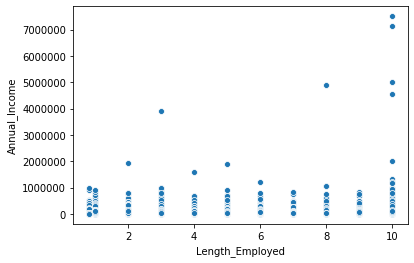

In [39]:
#Checking correaltion between Loan_Amount_Requested & Income
sn.scatterplot(Train_dt_full['Length_Employed'],Train_dt_full['Annual_Income'])

Above shows it increases little bit experience in this given data, might be as our experience scale is discrete

# Home_Owner

In [40]:
Train_dt_full.Home_Owner.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

To handle the missing value we will use the same aggregate techniques as used earlier for Length Employed

In [41]:
Train_dt_full.groupby('Home_Owner').agg({'Loan_Amount_Requested':['mean','median','min','max']})

Loan_Amount_Requested                          
                            mean   median     min      max
Home_Owner                                                
Mortgage            16040.132206  15000.0   500.0  35000.0
None                 9420.000000  10375.0  2800.0  15000.0
Other               10642.857143  10000.0  1000.0  35000.0
Own                 13567.704591  12000.0   900.0  35000.0
Rent                12443.831986  10625.0   500.0  35000.0

In [42]:
Train_dt_full.groupby('Home_Owner').agg({'Annual_Income':['mean','median','min','max']})

Annual_Income                              
                    mean   median       min        max
Home_Owner                                            
Mortgage    83699.371184  72000.0   7904.04  7500000.0
None        70550.000000  55650.0  22200.00   150000.0
Other       64540.743590  57500.0  11389.00   186000.0
Own         66104.826361  55000.0   4000.00  1200000.0
Rent        62077.534637  54000.0   4000.00  1950000.0

In [43]:
#Agrregates for the NULL values
Train_dt_full[Train_dt_full['Home_Owner'].isnull()].median(axis=0)

Loan_Amount_Requested      12000.0
Length_Employed                6.0
Home_Owner                     NaN
Annual_Income              62000.0
Debt_To_Income                16.9
Inquiries_Last_6Mo             0.0
Months_Since_Deliquency       32.0
Number_Open_Accounts          10.0
Total_Accounts                23.0
Interest_Rate                  2.0
dtype: float64

In [44]:
Train_dt_full[Train_dt_full['Home_Owner'].isnull()].mean(axis=0)

Loan_Amount_Requested      14264.489723
Length_Employed                5.834873
Home_Owner                          NaN
Annual_Income              73070.153357
Debt_To_Income                17.265033
Inquiries_Last_6Mo             0.787250
Months_Since_Deliquency       34.465663
Number_Open_Accounts          11.158468
Total_Accounts                24.945087
Interest_Rate                  2.161703
dtype: float64

Above we can assume that the Home_owner category which is nearest to the missing values is Own 

In [45]:
Train_dt_full['Home_Owner'].fillna('Own',inplace=True)

In [46]:
Train_dt_full['Home_Owner'].isnull().sum()

0

In [47]:
Train_dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Loan_Amount_Requested      164309 non-null float64
Length_Employed            164309 non-null float64
Home_Owner                 164309 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


NUll Handling is done, now have to convert categorical to numerical

In [48]:
Train_dt_full.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,0.8,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000.0,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000.0,0.8,Own,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000.0,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


Change of thoughts!! Will deal with categorical values in  the end, First will finish for missing values

# Annual_Income

In [49]:
Train_dt_full.Annual_Income.isnull().sum()

25102

We will not directly replace the mssing annual income value with a single aggregate , rather we assume that length employed might be a better fill for income , as income for a 10+ years employees will not be comparable to 1 year exp employee (off course there can be outliers)
Also in the data looks like some outliers for income so we will chose median instead of mean

In [50]:
Avg_income=Train_dt_full.groupby('Length_Employed')['Annual_Income'].median()

In [51]:
Train_dt_full=Train_dt_full.set_index(['Length_Employed'])


In [52]:
Train_dt_full['Annual_Income'].fillna(Avg_income,inplace=True)

In [53]:
Train_dt_full['Annual_Income'].isnull().sum()

0

In [54]:
Train_dt_full=Train_dt_full.reset_index()

In [55]:
Train_dt_full.head()

,Length_Employed,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,0.8,7000.0,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,4.0,30000.0,Mortgage,60000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,7.0,24725.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,0.8,16000.0,Own,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,8.0,17000.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [56]:
Train_dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Length_Employed            164309 non-null float64
Loan_Amount_Requested      164309 non-null float64
Home_Owner                 164309 non-null object
Annual_Income              164309 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


Missing values for Annual_Income is now handled !!!!

# Months_Since_Deliquency

In [57]:
Train_dt_full['Months_Since_Deliquency'].isnull().sum()

88379

In [58]:
Train_dt_full['Months_Since_Deliquency'].unique()

array([ nan,  17.,  16.,  68.,  13.,   6.,  64.,  10.,  63.,  33.,  22.,
        28.,   8.,  26.,  41.,  46.,  62.,  21.,  12.,  52.,   3.,  65.,
        43.,  53.,  44.,   1.,  11.,  71.,  23.,  15.,  48.,  39.,  30.,
        32.,  18.,  24.,  47.,  66.,  19.,  76.,   4.,  29.,  45.,  38.,
        56.,  37.,  20.,  35.,   2.,   9.,  34.,  14.,  59.,  36.,  50.,
        81.,  72.,  69.,  57.,  25.,   7.,  49.,  31.,  78.,  70.,  27.,
         5.,  51.,  58.,  75.,  42.,  74.,  40.,  67.,  61.,  55.,  77.,
        54.,   0.,  60.,  73.,  79.,  82.,  80.,  83.,  88., 127., 106.,
        99.,  97., 139.,  96., 119., 116.,  94., 141.,  86.,  91.,  84.,
        85.,  95.,  90.,  87., 103., 101., 121., 148.,  93., 122.,  92.,
       180., 105., 110., 129., 130., 135., 114., 102., 111.,  98., 131.,
       107., 170.])

In [59]:
Train_dt_full['Months_Since_Deliquency'].max()

180.0

In [60]:
Train_dt_full['Months_Since_Deliquency'].min()

0.0

In [61]:
len(Train_dt_full['Months_Since_Deliquency'].unique())

123

In [62]:
Train_dt_full.groupby('Interest_Rate')['Months_Since_Deliquency'].mean()

Interest_Rate
1    36.345819
2    34.220648
3    33.434987
Name: Months_Since_Deliquency, dtype: float64

In [63]:
Avg_deliq=Train_dt_full.groupby('Interest_Rate')['Months_Since_Deliquency'].median()

In [64]:
Train_dt_full=Train_dt_full.set_index('Interest_Rate')

In [65]:
Train_dt_full['Months_Since_Deliquency'].fillna(Avg_deliq,inplace=True)

In [66]:
Train_dt_full['Months_Since_Deliquency'].isnull().sum()

0

In [67]:
Train_dt_full=Train_dt_full.reset_index()

In [68]:
Train_dt_full.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,1,0.8,7000.0,Rent,68000.0,not verified,car,18.37,0,34.0,9,14,Female
1,3,4.0,30000.0,Mortgage,60000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female
2,3,7.0,24725.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,30.0,12,16,Male
3,3,0.8,16000.0,Own,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,30.0,16,22,Male
4,1,8.0,17000.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,34.0,19,30,Female


In [69]:
Train_dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Interest_Rate              164309 non-null int64
Length_Employed            164309 non-null float64
Loan_Amount_Requested      164309 non-null float64
Home_Owner                 164309 non-null object
Annual_Income              164309 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    164309 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


All Missing values are being taken care off !!!

Now we will deal with CATEGORICAL values

In [70]:
Train_dt_full['Income_Verified'].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [71]:
Train_dt_full['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

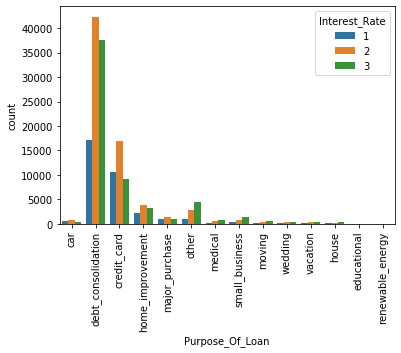

In [72]:
sn.countplot(Train_dt_full['Purpose_Of_Loan'],hue=Train_dt_full['Interest_Rate'])
plt.xticks(rotation=90)

In [73]:
len(Train_dt_full.columns)

13

As total columns is 14 and even if we assign indivual values of the categorical values then also number of features will be below 50.
So we can try get_dummies method

In [74]:
Train_dt_full=pd.get_dummies(Train_dt_full)

In [75]:
Train_dt_full.columns

Index(['Interest_Rate', 'Length_Employed', 'Loan_Amount_Requested',
       'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [76]:
Train_dt_full.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,...,0,0,0,0,0,0,0,0,1,0
1,3,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,...,0,0,0,0,0,0,0,0,1,0
2,3,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,...,0,0,0,0,0,0,0,0,0,1
3,3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,1,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,...,0,0,0,0,0,0,0,0,1,0


Now that we have completed the data preprocessing (of course there can be more work done on feature enginnering), we can think of training a machine learning model

In [77]:
#Separating features and value to be predicted
X=Train_dt_full.iloc[:,1:]

In [78]:
#Features
X.head()

,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,0,...,0,0,0,0,0,0,0,0,1,0
2,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
#Value to be predicted
y=Train_dt_full['Interest_Rate']

In [80]:
y.head()

0    1
1    3
2    3
3    3
4    1
Name: Interest_Rate, dtype: int64

Splitting data for train and testing ### Will use train test split method, will try kfold later

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=Train_dt_full['Interest_Rate'])

# Modelling 

As its a classification problem with multiclass, we will try RandomForest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [84]:
'''def accuracy(n):
    
    RF_CLF=RandomForestClassifier(n_estimators=n,random_state=42)
    RF_CLF.fit(X_train,y_train)
    y_pred=RF_CLF.predict(X_test)
    print('Accuracy Score for number of estimators: ',n,accuracy_score(y_test,y_pred))
    print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
    colnames=['Predicted Loan Category']))
    '''
    



"def accuracy(n):\n    \n    RF_CLF=RandomForestClassifier(n_estimators=n,random_state=42)\n    RF_CLF.fit(X_train,y_train)\n    y_pred=RF_CLF.predict(X_test)\n    print('Accuracy Score for number of estimators: ',n,accuracy_score(y_test,y_pred))\n    print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],\n    colnames=['Predicted Loan Category']))\n    "

#We tried running the code for estimators from 100 to 2500 almost all gave around 77% accuracy , so will go ahead with the 500 estimator to save time


In [85]:
RF_CLF=RandomForestClassifier(n_estimators=100,random_state=42)
RF_CLF.fit(X_train,y_train)
y_pred=RF_CLF.predict(X_test)

In [86]:
print('Accuracy Score for 100 estimators: ',accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for 100 estimators:  0.7776560566409023
Predicted Loan Category     1      2      3
Actual Loan Category                       
1                        7302   2173    667
2                         899  16978   3297
3                         431   3493  14053


In [87]:
from sklearn.linear_model import SGDClassifier

In [88]:
SGD_CLF=SGDClassifier(max_iter=1000,random_state=42)

In [89]:
SGD_CLF.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
y_pred_SGD=SGD_CLF.predict(X_test)

In [91]:
print('Accuracy Score for SGDClassifier: ',accuracy_score(y_test,y_pred_SGD))
print(pd.crosstab(y_test,y_pred_SGD,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for SGDClassifier:  0.35958452518613193
Predicted Loan Category     1   2      3
Actual Loan Category                    
1                        1613  21   8508
2                        2791  26  18357
3                        1870  21  16086


# Evaluation

# Cross Validation Kfolds

In [92]:


from sklearn.model_selection import cross_val_score

We have gone with stratified kfold approach instead of only Kfold because startify will split all the folds in the same ratio of the training data.

As per scikit learn :

cv : int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 5-fold cross validation,

int, to specify the number of folds in a (Stratified)KFold,

CV splitter,

An iterable yielding (train, test) splits as arrays of indices.

For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [93]:
#Random Forest Scores
RN_F_Score=cross_val_score(RandomForestClassifier(n_estimators=100,random_state=42),X,y,cv=5)

In [94]:
#Will try for multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [95]:
#Logistic Regression score
LR_Score=cross_val_score(LogisticRegression(random_state=42),X,y,cv=5)

In [96]:
#Support Vector Machine score
#SVC_Score=cross_val_score(SVC(),X,y,cv=5) 

We have commneted the SVM model is because it was running endlessly....We might have to scale the data using StandardScaler to run it faster.
##As of now we will compare Logistic Regression and Random Forest using Cross validation.

In [121]:
print('Average Score for Logistic Regression: ', LR_Score.mean())
print('Average Score for RandomForest Classifier: ', RN_F_Score.mean())

Average Score for Logistic Regression:  0.46175802818470124
Average Score for RandomForest Classifier:  0.7772428829384387


Looks like RandomForest Performed Better!! But yes many imporovement can be done by tunning parameters of other models, we can use
GridSearch Options to check for best parameters.

# Final Result

In [123]:
print('CLASSIFICATION REPORT',classification_report(y_test,y_pred))

CLASSIFICATION REPORT               precision    recall  f1-score   support

           1       0.85      0.72      0.78     10142
           2       0.75      0.80      0.77     21174
           3       0.78      0.78      0.78     17977

    accuracy                           0.78     49293
   macro avg       0.79      0.77      0.78     49293
weighted avg       0.78      0.78      0.78     49293



In [124]:
print('Accuracy Score for 100 estimators: ',accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for 100 estimators:  0.7776560566409023
Predicted Loan Category     1      2      3
Actual Loan Category                       
1                        7302   2173    667
2                         899  16978   3297
3                         431   3493  14053


Classification Report doesnt look too bad as around 77% we are getting as F1 Score which is a fair enough balance for Precision & Recal, Ofcourse it depends on the business needs about how good is this 77%

####################################################################################################

Bottom Part of the code basiclly using the above random forest classifier was run on a unknown dataset and uploaded to the Hackathon Website.

In [97]:
Test_data=pd.read_csv('D:\\DS\\Janata Hack_AnalyticsVidhya\\Machine Learning for Banking_30thMay2020\\test_fjtUOL8.csv')


In [98]:
Test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [99]:
Length_Employed=[]
for row in Test_data['Length_Employed']:
    
    if row=='< 1 year':
        Length_Employed.append(0.8)
    elif row=='1 year':
        Length_Employed.append(1)
    elif row=='2 years':
        Length_Employed.append(2)
    elif row=='3 years':
        Length_Employed.append(3)
    elif row=='4 years':
        Length_Employed.append(4)
    elif row=='5 years':
        Length_Employed.append(5)
    elif row=='6 years':
        Length_Employed.append(6)
    elif row=='7 years':
        Length_Employed.append(7)
    elif row=='8 years':
        Length_Employed.append(8)
    elif row=='9 years':
        Length_Employed.append(9)
    elif row=='10+ years':
        Length_Employed.append(10)
    else:
        Length_Employed.append(0.8) 

In [100]:
Test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [101]:
Test_data['Length_Employed']=pd.Series(Length_Employed)

In [102]:
Test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10.0,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",0.8,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",0.8,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [103]:
Test_data['Home_Owner'].fillna('Own',inplace=True)
################



In [104]:
Test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10.0,Own,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",0.8,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",0.8,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [105]:
Avg_income=Test_data.groupby('Length_Employed')['Annual_Income'].median()
Test_data=Test_data.set_index(['Length_Employed'])
Test_data['Annual_Income'].fillna(Avg_income,inplace=True)
Test_data['Annual_Income'].isnull().sum()
Test_data=Test_data.reset_index()
###############
#Avg_deliq=Test_data.groupby('Interest_Rate')['Months_Since_Deliquency'].median()
#Test_data=Test_data.set_index('Interest_Rate')
Test_data['Months_Since_Deliquency'].fillna(Test_data['Months_Since_Deliquency'].median(),inplace=True)
#Test_data=Test_data.reset_index()
##############

In [106]:
Test_data.head()

,Length_Employed,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10.0,10164310,"27,500",Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10.0,10164311,"26,000",Own,110000.0,not verified,credit_card,11.37,0,31.0,6,23,Male
2,0.8,10164312,"6,075",Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,31.0,5,20,Male
3,10.0,10164313,"12,000",Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,31.0,6,8,Male
4,0.8,10164314,"35,000",Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [107]:
Test_data["Loan_Amount_Requested"] = Test_data["Loan_Amount_Requested"].str.replace(",","").astype(float)

In [108]:
Test_data=pd.get_dummies(Test_data)

In [109]:
Test_data.columns

Index(['Length_Employed', 'Loan_ID', 'Loan_Amount_Requested', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [110]:
Test_data_Final=Test_data.copy()

In [111]:
Test_data_Final.drop(['Loan_ID'],axis=1,inplace=True)

In [112]:
Test_data_Final.head()

,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10.0,27500.0,129000.0,12.87,0,68.0,10,37,1,0,...,0,0,0,0,0,0,0,0,0,1
1,10.0,26000.0,110000.0,11.37,0,31.0,6,23,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.8,6075.0,75000.0,6.83,2,31.0,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10.0,12000.0,73000.0,7.76,0,31.0,6,8,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.8,35000.0,156000.0,9.62,0,26.0,9,21,1,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
y_pred_TestData=RF_CLF.predict(Test_data_Final)

In [114]:
type(y_pred_TestData)

numpy.ndarray

In [115]:
y_pred_TestData=pd.Series(y_pred_TestData,name='Interest_Rate')

In [116]:
y_pred_TestData.head()

0    1
1    2
2    2
3    2
4    3
Name: Interest_Rate, dtype: int64

In [117]:
y_pred_TestData=pd.concat([Test_data['Loan_ID'],y_pred_TestData],axis=1)

In [118]:
y_pred_TestData.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,2
2,10164312,2
3,10164313,2
4,10164314,3


In [119]:
y_pred_TestData.to_csv('ML_Banking_RandomForest.csv',index=False)